<a href="https://colab.research.google.com/github/grace1996-beep/week_7_core_ip/blob/main/HousePrice_prediction_weeek_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Defining the question** 

Predicting the price of a house given the x variables.

other analysis questions include;

1. which the most occuring price?

2. which is the least occuring price?

3. how many bedrooms are there in the most occuring price?

4. how many bedrooms are there in the least occuring price?

**Metrics of success**

To achieve my goal defined in the above question il follow the following steps

1. loading my datasets
2. checking for null values
3. checking for duplicaated values
4. checking for outliers.
5. performing multi linear regression.
6. performing quantile Regression.
7. performing ridge regression.
8. performing lasso regression.
9. performing elastic net regresion.
10. providing recommendations.

**Importing liblaries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Loading dataset**

In [2]:
#importing my dataset
df=pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [ ]:
#checking dfs shape
df.shape
df.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [ ]:
df.shape

(21613, 20)

**DATA CLEANING**

In [3]:
#checking for null values
df.isnull().sum()
#there are no null values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#checking for duplicated values
df.duplicated().sum()
#there are three duplicated values. after dropping them the shape of df reduces by three rows.
df.drop_duplicates()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21610 rows x 20 columns]

In [31]:
#changing bathrooms and floors column to type integer
df.bathrooms = df.bathrooms.astype(int)
df.bathrooms
df.floors=df.floors.astype(int)
df.head()
df.lot=df.sqft_lot.astype(float)
df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [32]:
#checking appropriate dtpes
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
#checking for unique values
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms            9
sqft_living       1038
sqft_lot          9782
floors               3
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [55]:
#Dropping unnecesary columns
#

#
df.drop(['id'], axis=1, inplace=True)
df.head()


price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  221900.0         3          1  ... -122.257           1340        5650
1  538000.0         3          2  ... -122.319           1690        7639
2  180000.0         2          1  ... -122.233           2720        8062
3  604000.0         4          3  ... -122.393           1360        5000
4  510000.0         3          2  ... -122.045           1800        7503

[5 rows x 19 columns]

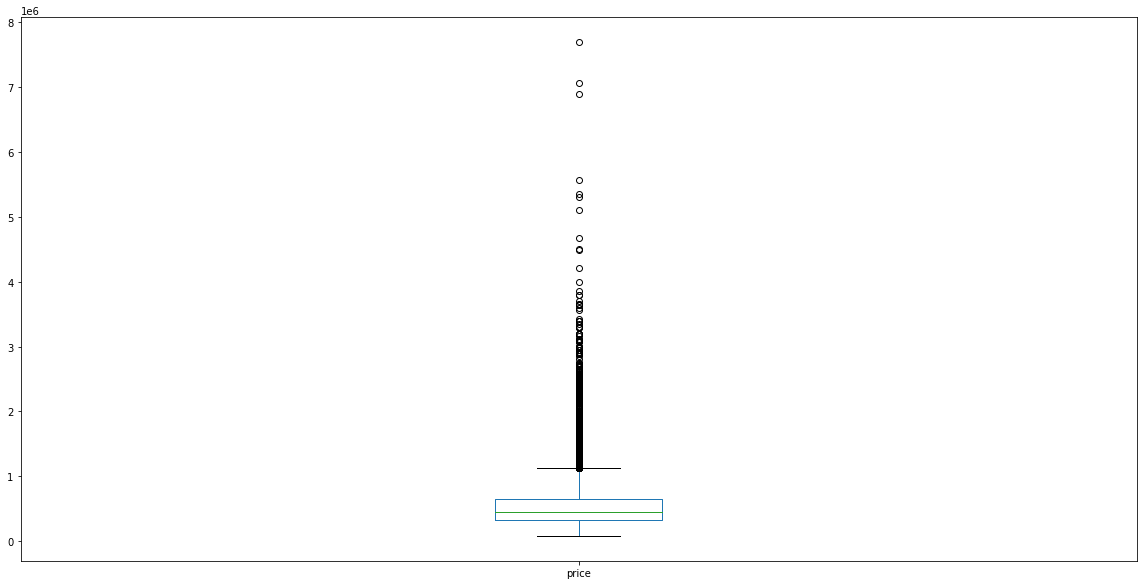

In [56]:
#identifying outliers 
df.boxplot(column =['price'], grid = False)


In [57]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df_out.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)


(14953, 19)
(21613, 19)


In [59]:
df_out.head()

price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  221900.0         3          1  ... -122.257           1340        5650
2  180000.0         2          1  ... -122.233           2720        8062
3  604000.0         4          3  ... -122.393           1360        5000
4  510000.0         3          2  ... -122.045           1800        7503
6  257500.0         3          2  ... -122.327           2238        6819

[5 rows x 19 columns]

**ANALYSIS QUESTIONS**

**Question 1**

which price had the highest occurence

In [60]:
# calculating the price that is most  occurent
bedrooms = df_out.groupby(['price']).size()

bedrooms= bedrooms.to_frame(name = 'COUNT').reset_index()

# Sorting the dataframe in the descending order of 'COUNT'
bedrooms= bedrooms.sort_values(by = 'COUNT', ascending = False)

bedrooms['PROPORTION'] = (bedrooms['COUNT'] / bedrooms['COUNT'].sum()) * 100
bedrooms.head()

price  COUNT  PROPORTION
991   350000.0    138    0.922892
845   325000.0    126    0.842640
1503  450000.0    125    0.835953
1376  425000.0    124    0.829265
719   300000.0    116    0.775764

**Question 2**

The least occuring  price

In [61]:
bedrooms= bedrooms.sort_values(by = 'COUNT', ascending = True)

bedrooms['PROPORTION'] = (bedrooms['COUNT'] / bedrooms['COUNT'].sum()) * 100
bedrooms.head()

price  COUNT  PROPORTION
1977  564450.0      1    0.006688
520   267100.0      1    0.006688
518   266950.0      1    0.006688
517   266750.0      1    0.006688
515   266490.0      1    0.006688

**Question 3**

how many bedrooms does the least occuring price have

In [62]:
Nairobi11 = df_out.loc[df_out['price'] ==564450]
County_causes11 = Nairobi11.groupby(['bedrooms']).size()
County_causes11 = County_causes11.to_frame(name = 'COUNT').reset_index()
County_causes11 = County_causes11.sort_values(by = 'COUNT', ascending = False)
County_causes11.head()

bedrooms  COUNT
0         3      1

**Question 4**

how many bedrooms are there in the leading price of 350000

In [63]:
Nairobi11 = df_out.loc[df_out['price'] ==350000]
County_causes11 = Nairobi11.groupby(['bedrooms']).size()
County_causes11 = County_causes11.to_frame(name = 'COUNT').reset_index()
County_causes11 = County_causes11.sort_values(by = 'COUNT', ascending = False)
County_causes11.head()
#most people prefer 3 bedroom houses

bedrooms  COUNT
1         3     77
2         4     35
0         2     21
3         5      5

**UNIVARIATE ANALYSIS**

Categorical variables

In [64]:
#creating a frequency table to show  occurence of each category here am using 'year'
freq_table=df_out.groupby(['yr_built']).size().reset_index(name='Count').rename(columns={'yr_built':'year'})
freq_table


year  Count
0    1900     46
1    1901     23
2    1902     22
3    1903     34
4    1904     36
..    ...    ...
111  2011    107
112  2012    139
113  2013    134
114  2014    438
115  2015     23

[116 rows x 2 columns]

In [65]:
import matplotlib.pyplot as plt
# bar charts are used to display value associated with categorical data
plt.bar(freq_table['year'],freq_table['Count'])
plt.show()


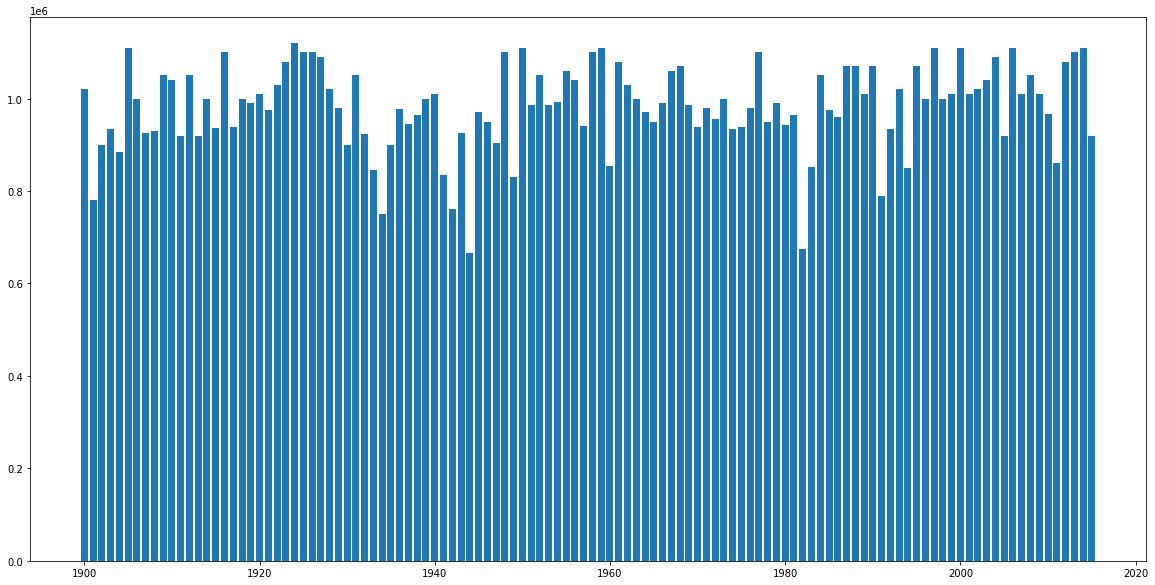

In [66]:
plt.bar(df_out['yr_built'],df_out["price"])
plt.show()


In [67]:
#checking age distribution
prices = df_out['price']
bins            = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

plt.hist(prices, bins=10, histtype='bar', rwidth=0.9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of price') 
plt.show()


In [77]:
# univariate analysis: bedrooms variable plot bar
#
plt.figure(figsize = (10, 5))
df_out['bedrooms'].value_counts().plot.bar()

3 bedrooms are more reported

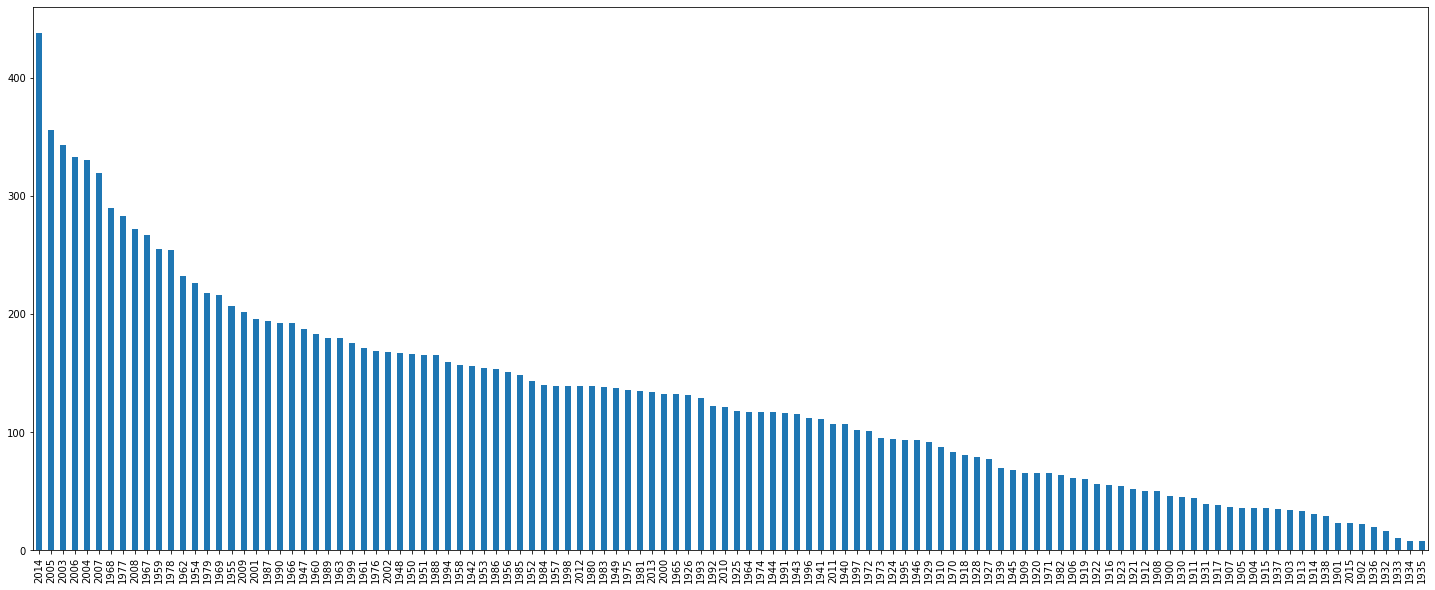

In [78]:
# univariate analysis: year_built variable plot bar
#
plt.figure(figsize=(25,10))
df_out['yr_built'].value_counts().plot.bar()

2014 has more houses built

measures of central tendancy

In [68]:
cs=df_out['price'].mean()
print(cs)
#median
cl=df_out['bathrooms'].mode()
print(cl)
cm=df_out['floors'].median()
print(cm)


438709.190730957
0    2
dtype: int64
1.0


In [69]:
#standard deviation
std=df_out['price'].std()
std


180363.26760517343

In [70]:
#variance
var=df_out['bathrooms'].var()
var


0.3539030642723343

In [71]:
df_out["price"].quantile([0.25,0.5,0.75])

0.25    300000.0
0.50    405000.0
0.75    548000.0
Name: price, dtype: float64

In [72]:
#range
max_range = df_out["price"].max()
min_range= df_out["price"].min()

# Calculating the range
max_range- min_range


1038000.0

In [73]:
#box plot for price
sns.boxplot(df_out["price"], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


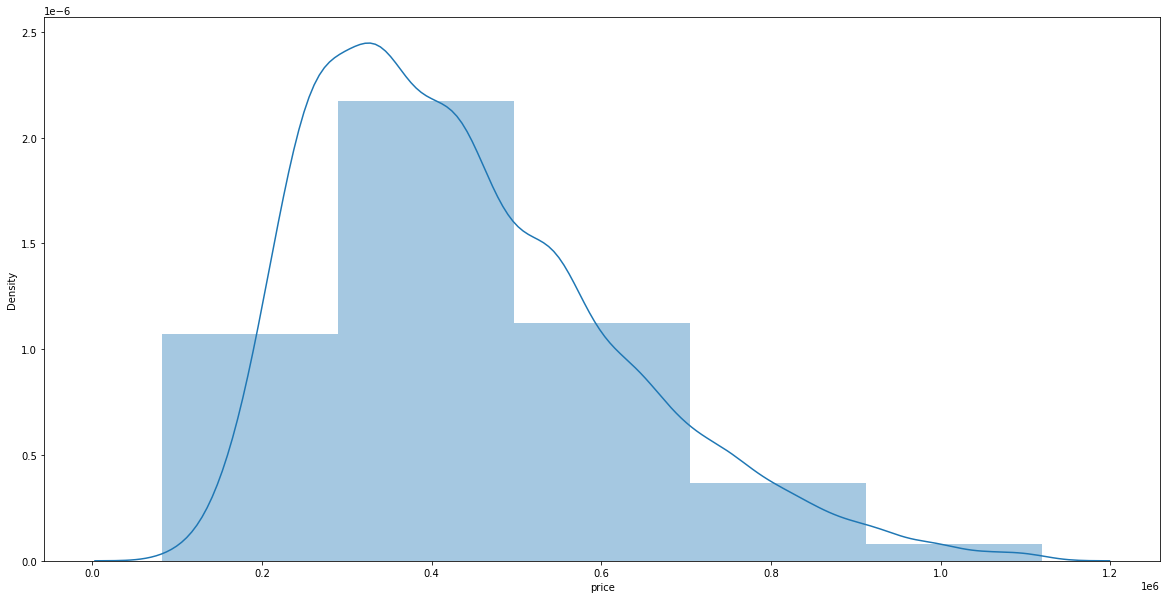

In [74]:
#plotting histograms
sns.distplot(df_out['price'],bins=5)

**BIVARIATE ANALYSIS**

Numerical-Numerical variables

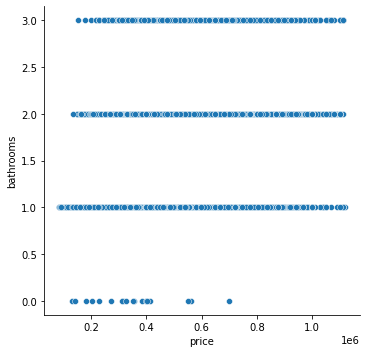

In [75]:
#scatter plot between two numerical values
sns.relplot(x='price',y='bathrooms',data=df_out)

**Observations**

theres is a relationship between price and bathrooms

In [125]:
sns.pairplot(df_out)
plt.show()


Multivariate Analysis

In [79]:
#dividin the data into x and y variables
x = df_out.drop(columns = ['price'])
y = df_out['price']
#
print(x)
print(y)

       bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
0             3          1         1180  ... -122.257           1340        5650
2             2          1          770  ... -122.233           2720        8062
3             4          3         1960  ... -122.393           1360        5000
4             3          2         1680  ... -122.045           1800        7503
6             3          2         1715  ... -122.327           2238        6819
...         ...        ...          ...  ...      ...            ...         ...
21608         3          2         1530  ... -122.346           1530        1509
21609         4          2         2310  ... -122.362           1830        7200
21610         2          0         1020  ... -122.299           1020        2007
21611         3          2         1600  ... -122.069           1410        1287
21612         2          0         1020  ... -122.299           1020        1357

[14953 rows x 18 columns]
0

In [80]:
#Then statndardize the data using StandardScaler, Fitting on the Training set and transforming both on the Training and Test Set.
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn import metrics

In [82]:
# Subject our features/indepedent to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lDA= LDA()
#
lDA= lDA.fit(df_out, y)
ld_dfout = lDA.transform(df_out)

In [83]:
# Display the coeficients of the reducted columns
lDA.coef_

array([[ 0.00000000e+00,  1.08542109e+00, -1.56240848e-01, ...,
        -4.58400226e+00, -2.44175535e-03,  1.29312394e-03],
       [ 0.00000000e+00, -1.77770331e+00,  4.78733900e-01, ...,
        -2.19741910e+00, -2.77128457e-03,  1.63085144e-05],
       [ 0.00000000e+00,  9.18317467e-01, -6.11286765e-01, ...,
        -1.76278451e+01, -6.34782278e-03,  7.81580996e-04],
       ...,
       [ 0.00000000e+00, -6.44062065e-01,  1.96600457e+00, ...,
        -3.09305150e+00,  2.13642365e-03, -2.60874104e-04],
       [ 0.00000000e+00,  4.91822766e-01,  6.63784733e-01, ...,
        -7.03737287e+00,  3.12585210e-04, -2.56750202e-04],
       [ 0.00000000e+00, -3.06558558e+00, -5.48041893e+00, ...,
         2.01789128e-01, -3.08489909e-03, -1.59701973e-05]])

In [85]:
 #displaying coeffient in dataframe.
#
coeff = pd.DataFrame(index=df_out.columns.values, data=lDA.coef_[0].T)
coeff.sort_values(0, ascending=False)

0
bedrooms       1.085421e+00
floors         9.527170e-01
yr_built       5.690809e-02
zipcode        3.278883e-02
sqft_lot15     1.293124e-03
price          0.000000e+00
view          -9.983486e-17
yr_renovated  -2.752003e-16
waterfront    -4.390583e-16
sqft_lot      -1.452391e-04
sqft_above    -1.765665e-03
sqft_living15 -2.441755e-03
sqft_basement -2.649356e-03
sqft_living   -3.063217e-03
bathrooms     -1.562408e-01
condition     -2.405149e+00
grade         -3.818681e+00
long          -4.584002e+00
lat           -2.346206e+01

**MULTI LINEAR REGRESSION**

There is no heteroskedasticity present

**defining x and y variables**

In [86]:
df_out.head()

price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  221900.0         3          1  ... -122.257           1340        5650
2  180000.0         2          1  ... -122.233           2720        8062
3  604000.0         4          3  ... -122.393           1360        5000
4  510000.0         3          2  ... -122.045           1800        7503
6  257500.0         3          2  ... -122.327           2238        6819

[5 rows x 19 columns]

In [89]:
#1. checking for multicollinearity
# Let's display the correlations between the variables
# Detecting Multicollinearity on the predictor variables & Checking for multicollinearity on the independent variables only
#
coll= df_out.drop(columns = ['price'])

In [126]:
corr=coll.corr()
corr.head()

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms     1.000000   0.373711  ...       0.414035    0.196657
bathrooms    0.373711   1.000000  ...       0.425199   -0.121612
sqft_living  0.615417   0.565017  ...       0.727292    0.149787
sqft_lot     0.204813  -0.119119  ...       0.200363    0.881996
floors       0.103579   0.512919  ...       0.276750   -0.383502

[5 rows x 18 columns]

The coefficient of 1 across the diagonal shows that a variable is perfectly correlated to itself.

In [91]:
x=df_out.drop(['price'],axis=1).values
y=df_out['price'].values


**Splitting the dataset into train and test set**

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

**Training the model on the training set**

In [93]:
from sklearn.linear_model import LinearRegression
nl=LinearRegression()
nl.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the test results**

In [94]:
y_pred=nl.predict(x_test)
print(y_pred)

[378044.61490288 402117.81890243 435026.68382821 ... 211548.99657038
 383063.49488905 411141.93836368]


**Evaluating the model**

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6469349050101352

my r2_score is not that bad meaning i can use the model to predict my results.


**Plotting the results**

Text(0.5, 1.0, 'Actual vs Predicted')

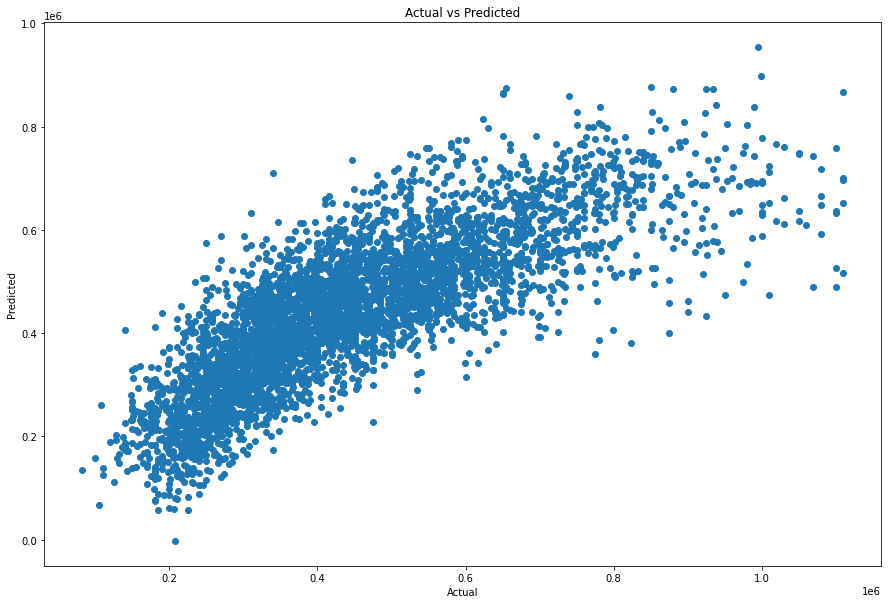

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,10])
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

observations

my predicted vs actual  results are quite close to each other

**Predicted values**

In [97]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred})
pred_df[0:20]

Actual Value  Predicted value
0       420000.0    378044.614903
1       325000.0    402117.818902
2       600000.0    435026.683828
3       953007.0    695189.292509
4       289000.0    287819.279643
5       270000.0    226642.436170
6       510000.0    451286.839093
7       499950.0    375493.254846
8       689888.0    681531.453450
9       875000.0    665788.890471
10      346100.0    320580.211201
11      775000.0    496235.263624
12      258000.0    298796.002034
13      359000.0    397158.283342
14      405000.0    536262.293898
15      323800.0    341756.831154
16      368000.0    430822.585964
17      511000.0    674063.076040
18      300000.0    345102.612750
19      500000.0    491408.771848

In [99]:
#getting the residuals
#
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)
#
#getting residual mean
residuals.mean()

-4093.8636191743185

The above code outputs the predicted values which are quite close to the actual values. this means that my model is a strong model

In [100]:
#Checking for heteroskedascicity of model using bartlett's test.
# 
import scipy as sp
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
#
#setting degree of freedom
degree_of_freedom = len(y_pred)-1
#
#getting probality
probability = 1 - p_value
#
#computing critical value using chi_squared distribution.
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
#
print(test_result)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


408.0253073475858
the variances are homogeneous!


**RIDGE REGRESSION**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

**Defining x and y variables**

In [ ]:
x=df_out.drop(['price'],axis=1).values
y=df_out['price'].values


**Defining model**

In [ ]:
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 79646.980 (1679.076)


**Observation**


Running the example evaluates the Ridge Regression algorithm on the df_out dataset and reports the average MAE across the three repeats of 10-fold cross-validation.

In this case, we can see that the model achieved a MAE of about 3.382.



**Making predictions using ridge model**

In [ ]:
# fit model
model.fit(x, y)
# define new data
row = [7129300520,3,	1,	1180,	5650,	1,	0	,0,	3	,7,	1180,	0	,1955,	0	,98178,	47.5112	,-122.257	,1340	,5650]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 291650.545


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.2364e-24): result may not be accurate.
  overwrite_a=True).T


Running the example fits the model and makes a prediction for the new rows of data.

predicted result is quite close to the actual result which is 221900.0

**Tuning ridge Hyperparameters**

In [ ]:
from numpy import arange

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -79647.012
Config: {'alpha': 0.99}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.15403e-24): result may not be accurate.
  overwrite_a=True).T


Running the example evaluates each combination of configurations using repeated cross-validation.

In this case, we can see that we achieved slightly better results than the default 79647.012 vs. 79646.980 Ignore the sign; the library makes the MAE negative for optimization purposes.




**QUANTILE REGRESSION**

quantile regression is used when assumptions about the random error  term in linear regression are nolonger true.

In [101]:
## Generating some data with constant variance /noise
# This is the assumption of linear regression
# 
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt



Least Absolute Deviation¶
The LAD model is a special case of quantile regression where q=0.5


In [102]:
mod = smf.quantreg('price ~ bathrooms', df_out)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.04158
Model:                       QuantReg   Bandwidth:                   3.474e+04
Method:                 Least Squares   Sparsity:                    4.434e+05
Date:                Fri, 16 Apr 2021   No. Observations:                14953
Time:                        07:49:09   Df Residuals:                    14951
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.66e+05   5251.351     50.654      0.000    2.56e+05    2.76e+05
bathrooms     8.8e+04   3047.878     28.873      0.000     8.2e+04     9.4e+04


**Does the number of bathrooms affect the price**

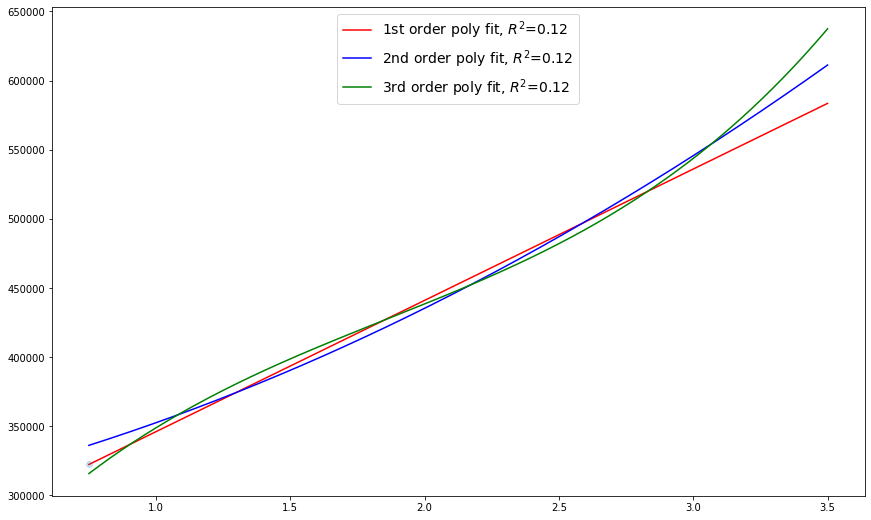

In [ ]:
nobs=1000
x1 = pd.DataFrame({'bathrooms': np.linspace(df_out.bathrooms.min(), df_out.bathrooms.max(), nobs)})

poly_1 = smf.ols(formula='price ~ 1 + bathrooms', data=df_out).fit()
poly_2 = smf.ols(formula='price ~ 1 + bathrooms + I(bathrooms ** 2.0)', data=df_out).fit()
poly_3 = smf.ols(formula='price ~ 1 + bathrooms + I(bathrooms ** 2.0) + I(bathrooms ** 3.0)', data=df_out).fit()

plt.figure(figsize=(9 * 1.618, 9))
plt.plot(x1.bathrooms, poly_1.predict(x1), 'r-', 
         label='1st order poly fit, $R^2$=%.2f' % poly_2.rsquared)
plt.plot(x1.bathrooms, poly_2.predict(x1), 'b-', 
         label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared)
plt.plot(x1.bathrooms, poly_3.predict(x1), 'g-', 
         label='3rd order poly fit, $R^2$=%.2f' % poly_2.rsquared)

plt.plot(x, y, 'o', alpha=0.2)
plt.legend(loc="upper center", fontsize=14)

**Second plot**

In [ ]:
# plot to show conditional bathroom distribution
n = models.shape[0]
p1 = plt.plot(models.q, models.b, color='black', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{income}$')
plt.xlabel('Quantiles of the conditional bathroom distribution')
plt.legend()
plt.show()

**Observation**
The dotted black lines form 95% point-wise confidence band around 10 quantile regression estimates (solid black line). The red lines represent OLS regression results along with their 95% confidence interval.

the quantile regression point estimates lie inside the OLS confidence interval, which suggests that the effect of price on bathrooms my be constant across the distribution.


**LASSO REGRESSION**

**importing liblaries to be used**

In [103]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [104]:

# define model
model = Lasso(alpha=1.0)

**Defining x and y**

In [105]:
x=df_out.drop(['price'],axis=1).values
y=df_out['price'].values



In [106]:
from sklearn.preprocessing import StandardScaler
#
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [107]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [108]:
 #Creating lasso object
# 
lasso = linear_model.Lasso() 
#
# Fitting the models
# 
lasso.fit(x, y) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6061826604844.969, tolerance: 48640214091.97739
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(x, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(x))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6539216039171485
lasso MSE: 11257491659.25102
lasso coef: [ -6402.02586177   7466.12091882  87955.74098255  -9433.2071145
   5985.98573883      0.              0.          18406.78236384
  62857.07721042 -29680.94420173 -19177.90099814 -55360.93958522
      0.         -14235.04330576  76673.08385044   -508.20176762
  25021.88035601 -17262.69807816]


lasso MSE: 11257491659.25102




In [110]:
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(5, 10, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

In [111]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 
linear.fit(x_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(x_test, y_test))
print("linear score:", linear.score(x_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(x_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(x_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 20.0}
lasso score: 0.6507124218134603
linear score: 0.6507238100259097
lasso MSE: 10988691038.848644
linear MSE: 10988332762.299728
lasso best estimator coef: [ -5688.39010574   6058.89306097  55740.07759016  -9256.1526206
   6456.15681953      0.              0.          18899.7451116
  63319.98962366   2373.14559239     -0.         -54292.87603286
      0.         -14370.53268922  76993.35226801   -885.87036124
  23638.67661355 -17054.61819812]
linear coef: [-5.73933076e+03  6.09219622e+03  3.24086525e+04 -9.27544092e+03
  6.47669354e+03 -1.45519152e-11  1.45519152e-11  1.89177346e+04
  6.33118309e+04  2.52510527e+04  1.33992071e+04 -5.43506026e+04
  8.18545232e-12 -1.44327932e+04  7.70121185e+04 -9.36393852e+02
  2.36629831e+04 -1.70559621e+04]


lassso score is 65%

In [112]:
leso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(x_train, y_train)
    leso.append(lasso.coef_) 

In [114]:
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, leso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefficient')

plt.show()

**ELASTIC NET REGRESSION**

**Loading the liblaries**

In [115]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

**Defining x and y**

In [117]:
x=df_out.drop(['price'],axis=1).values
y=df_out['price'].values


In [118]:
 #Creating our linear regression model for the purpose of comparison(setting baseline)
# 
regression=LinearRegression()
regression.fit(x,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(x)))
print(first_model) 
#baseline MSE is 11257491632.125916

11257491632.125916


In [120]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.1,.2,.3,.9]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

**fitting the model**

In [121]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
##getting MSE
search.fit(x,y)
search.best_params_
abs(search.best_score_)

11359511820.027142

**getting alpha and l1 ratio**

In [122]:
#getting aplha and L1 ratio
#
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.9}

In [123]:
# The best hyperparameters was an alpha set to 0.0001 and a l1_ratio of 0.9. 
# With these settings we got an MSE of 11359511820.027142 . This is above our baseline model of MSE 11257491632.125916  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
#finding best alpha nd L1_ratio
elastic=ElasticNet(normalize=True,alpha=0.0001,l1_ratio=0.9)
elastic.fit(x,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(x)))
print(second_model)

11548047966.35555


follow up questions
1. did i have the right data? yes jmy data was okay to perform my analysis

**conclusion**

1. most people  need houses that are three bedrooms.

2. most of the houses were built in the year 2014

3. most of the house prices lie betweeen 300000 to 4500000

